## CNN

In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models, callbacks

### Load Fashion MNIST dataset

In [2]:
(X_train, y_train) , (X_test, y_test)= datasets.fashion_mnist.load_data()

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
X_val, X_train = X_train[-10000:], X_train[:-10000]
y_val, y_train = y_train[-10000:], y_train[:-10000]
print(X_train.shape, X_val.shape, y_val.shape, y_test.shape)

(50000, 28, 28) (10000, 28, 28) (10000,) (10000,)


In [4]:
def plot_confusion_matrix(validations, predictions):
    """ Plot confusion matrix and compare real labels with predicted labels. """

    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(10, 5))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=label_names,
                yticklabels=label_names,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_images(training_images, labels):
    plt.figure(figsize=(14,14))
    for i in range(20):
        plt.subplot(7,10,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(training_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(label_names[int(labels[i])])
    plt.show()

### Plot Example Images

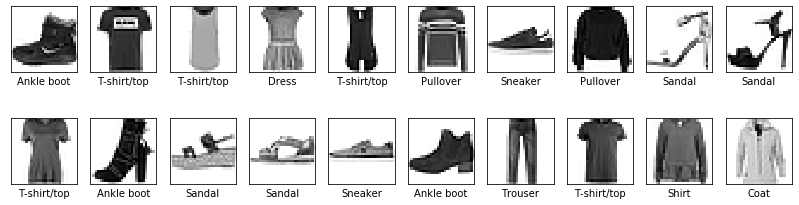

In [5]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_images(X_train, y_train)

### Define Model

In [6]:
X_train = X_train.reshape(list(X_train.shape) + [1])
X_test = X_test.reshape(list(X_test.shape) + [1])
X_val = X_val.reshape(list(X_val.shape) + [1])

print('X_train shape: {}, X_test shape: {}, X_val.shape: {}'.format(X_train.shape, X_test.shape, X_val.shape))

X_train shape: (50000, 28, 28, 1), X_test shape: (10000, 28, 28, 1), X_val.shape: (10000, 28, 28, 1)


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Fit Model

In [9]:
history = model.fit(X_train,
    y_train,
    epochs=10,
    callbacks = callbacks.EarlyStopping(monitor='loss', patience=1),
    validation_data=(X_val, y_val))

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7214 - accuracy: 0.7366 - val_loss: 0.3611 - val_accuracy: 0.8708
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3469 - accuracy: 0.8724 - val_loss: 0.3224 - val_accuracy: 0.8820
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.2904 - accuracy: 0.8922 - val_loss: 0.3072 - val_accuracy: 0.8911
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.2596 - accuracy: 0.9026 - val_loss: 0.2986 - val_accuracy: 0.8898
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.2319 - accuracy: 0.9133 - val_loss: 0.2727 - val_accuracy: 0.9033
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.2125 - accuracy: 0.9216 - val_loss: 0.2800 - val_accuracy: 0.9007
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.1866 - accuracy: 0.9308 - val_loss: 0.2642 -

### Evaluation and Prediction

In [10]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.3033 - accuracy: 0.8993


In [11]:
predictions = np.argmax(model.predict(X_test), axis=-1)

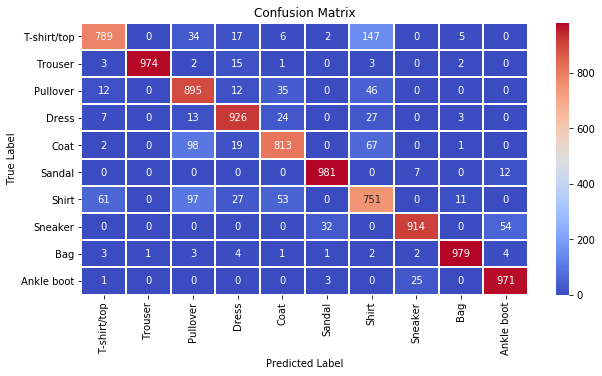

In [12]:
plot_confusion_matrix(y_test, predictions)

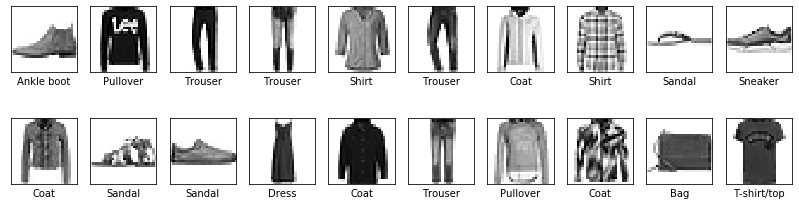

In [13]:
X_test = X_test.reshape(len(X_test), 28, 28)
plot_images(X_test, predictions)